In [1]:
# import packages

import numpy as np
import pandas as pd
from pandas import value_counts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('MMAdata1.csv')
data.head()

C:\Users\24937\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


LOAN_ID    LAST_DTE LAST_STAT ORIG_CHN                   SELLER  \
0  1.005381e+11  2002-08-01         P        C                    Other   
1  1.008168e+11  2002-09-01         P        B                    Other   
2  1.022925e+11  2002-08-01         P        C  Jpmorgan Chase Bank, Na   
3  1.030179e+11  2002-02-01         P        R                    Other   
4  1.045302e+11  2002-12-01         P        C             Amtrust Bank   

                                    SERVICER  orig_rt  LAST_RT  orig_amt  \
0        Citimortgage Asset Management, Inc.     7.75     7.75     60000   
1                                      Other     8.00     8.00     94000   
2                    Jpmorgan Chase Bank, Na     7.75     7.75     50000   
3                                      Other     6.15     6.15     84000   
4  Jpmorgan Chase Bank, National Association     8.25     8.25     30000   

    ORIG_VAL  ...  F90_UPB  F120_DTE F120_UPB F180_DTE  F180_UPB  LPI_DTE  \
0  109090.91  ...      0.0         0      0.0        0       0.0        0   
1  104444.44  ...      0.0         0      0.0        0       0.0        0   
2   68493.15  ...      0.0         0      0.0        0       0.0        0   
3   88421.05  ...      0.0         0      0.0        0       0.0        0   
4   37500.00  ...      0.0         0      0.0        0       0.0        0   

   FCC_DTE  NET_LOSS  relo_flg    profit  
0        0       0.0         N   69750.0  
1        0       0.0         N  225600.0  
2        0       0.0         N  116250.0  
3        0       0.0         N  154980.0  
4        0       0.0         N   37125.0  

[5 rows x 44 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265870 entries, 0 to 265869
Data columns (total 44 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   LOAN_ID    265870 non-null  float64
 1   LAST_DTE   265870 non-null  object 
 2   LAST_STAT  265870 non-null  object 
 3   ORIG_CHN   265870 non-null  object 
 4   SELLER     265870 non-null  object 
 5   SERVICER   265870 non-null  object 
 6   orig_rt    265870 non-null  float64
 7   LAST_RT    265870 non-null  float64
 8   orig_amt   265870 non-null  int64  
 9   ORIG_VAL   265870 non-null  float64
 10  LAST_UPB   265870 non-null  float64
 11  orig_trm   265870 non-null  int64  
 12  ORIG_DTE   265870 non-null  object 
 13  FRST_DTE   265870 non-null  object 
 14  oltv       265870 non-null  int64  
 15  ocltv      265870 non-null  int64  
 16  num_bo     265870 non-null  int64  
 17  dti        265870 non-null  int64  
 18  CSCORE_B   265870 non-null  int64  
 19  CSCORE_C   265870 non-n

In [4]:
# profit = Original UPB * Interest rate * (Loan Team/ 12)
# data['profit'] = data['orig_amt'] * (data['orig_rt']/100) * (data['orig_trm']/12)

In [5]:
# important columns
newdat = data.iloc[:,(np.array([4,5,8,9,10,11,16,17,19,20,21,22,23,24,25,26,27,28,32,34,36,38,40,44])-2).tolist()]
newdat.head()

LAST_STAT ORIG_CHN  orig_rt  LAST_RT  orig_amt   ORIG_VAL  oltv  ocltv  dti  \
0         P        C     7.75     7.75     60000  109090.91    55     55   30   
1         P        B     8.00     8.00     94000  104444.44    90     90   21   
2         P        C     7.75     7.75     50000   68493.15    73     73   22   
3         P        R     6.15     6.15     84000   88421.05    95     95   31   
4         P        C     8.25     8.25     30000   37500.00    80     80   24   

   CSCORE_B  ...  NUM_UNIT occ_stat state    msa  F30_UPB F60_UPB F90_UPB  \
0       782  ...         1        P    NE  36540      0.0     0.0     0.0   
1       680  ...         1        P    NE  30700      0.0     0.0     0.0   
2       781  ...         1        P    NE      0      0.0     0.0     0.0   
3       728  ...         1        P    NE  30700      0.0     0.0     0.0   
4       724  ...         1        P    NE      0      0.0     0.0     0.0   

   F120_UPB  F180_UPB  relo_flg  
0       0.0       0.0         N  
1       0.0       0.0         N  
2       0.0       0.0         N  
3       0.0       0.0         N  
4       0.0       0.0         N  

[5 rows x 24 columns]

In [6]:
newdat.nunique()

LAST_STAT        9
ORIG_CHN         3
orig_rt        872
LAST_RT        875
orig_amt       496
ORIG_VAL     18705
oltv            94
ocltv          113
dti             65
CSCORE_B       350
CSCORE_C       335
FTHB_FLG         3
purpose          4
PROP_TYP         5
NUM_UNIT         4
occ_stat         3
state            1
msa             17
F30_UPB      22777
F60_UPB       9795
F90_UPB       7595
F120_UPB      6334
F180_UPB      4692
relo_flg         2
dtype: int64

In [7]:
sns.__version__

'0.11.2'

In [8]:
newdat.loc[:,newdat.nunique()>10]

orig_rt  LAST_RT  orig_amt   ORIG_VAL  oltv  ocltv  dti  CSCORE_B  \
0         7.750    7.750     60000  109090.91    55     55   30       782   
1         8.000    8.000     94000  104444.44    90     90   21       680   
2         7.750    7.750     50000   68493.15    73     73   22       781   
3         6.150    6.150     84000   88421.05    95     95   31       728   
4         8.250    8.250     30000   37500.00    80     80   24       724   
...         ...      ...       ...        ...   ...    ...  ...       ...   
265865    3.250    3.250    167000  315094.30    53     53   42       786   
265866    3.000    3.000    499000  525263.20    95     95   30       761   
265867    3.250    3.250    152000  190000.00    80     80   19       704   
265868    3.375    3.375    268000  335000.00    80     80   40       733   
265869    3.000    3.000    164000  210256.40    78     78   34       792   

        CSCORE_C    msa  F30_UPB  F60_UPB  F90_UPB  F120_UPB  F180_UPB  
0              0  36540      0.0      0.0      0.0       0.0       0.0  
1            733  30700      0.0      0.0      0.0       0.0       0.0  
2              0      0      0.0      0.0      0.0       0.0       0.0  
3              0  30700      0.0      0.0      0.0       0.0       0.0  
4            758      0      0.0      0.0      0.0       0.0       0.0  
...          ...    ...      ...      ...      ...       ...       ...  
265865         0  36540      0.0      0.0      0.0       0.0       0.0  
265866       766  36540      0.0      0.0      0.0       0.0       0.0  
265867         0  30700      0.0      0.0      0.0       0.0       0.0  
265868       710  36540      0.0      0.0      0.0       0.0       0.0  
265869       812  30700      0.0      0.0      0.0       0.0       0.0  

[265870 rows x 15 columns]

In [9]:
high_dim_num_col = newdat.loc[:,newdat.nunique()>10].columns.tolist()
low_dim_cat_col = newdat.loc[:,newdat.nunique()<=10].columns.tolist()

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-

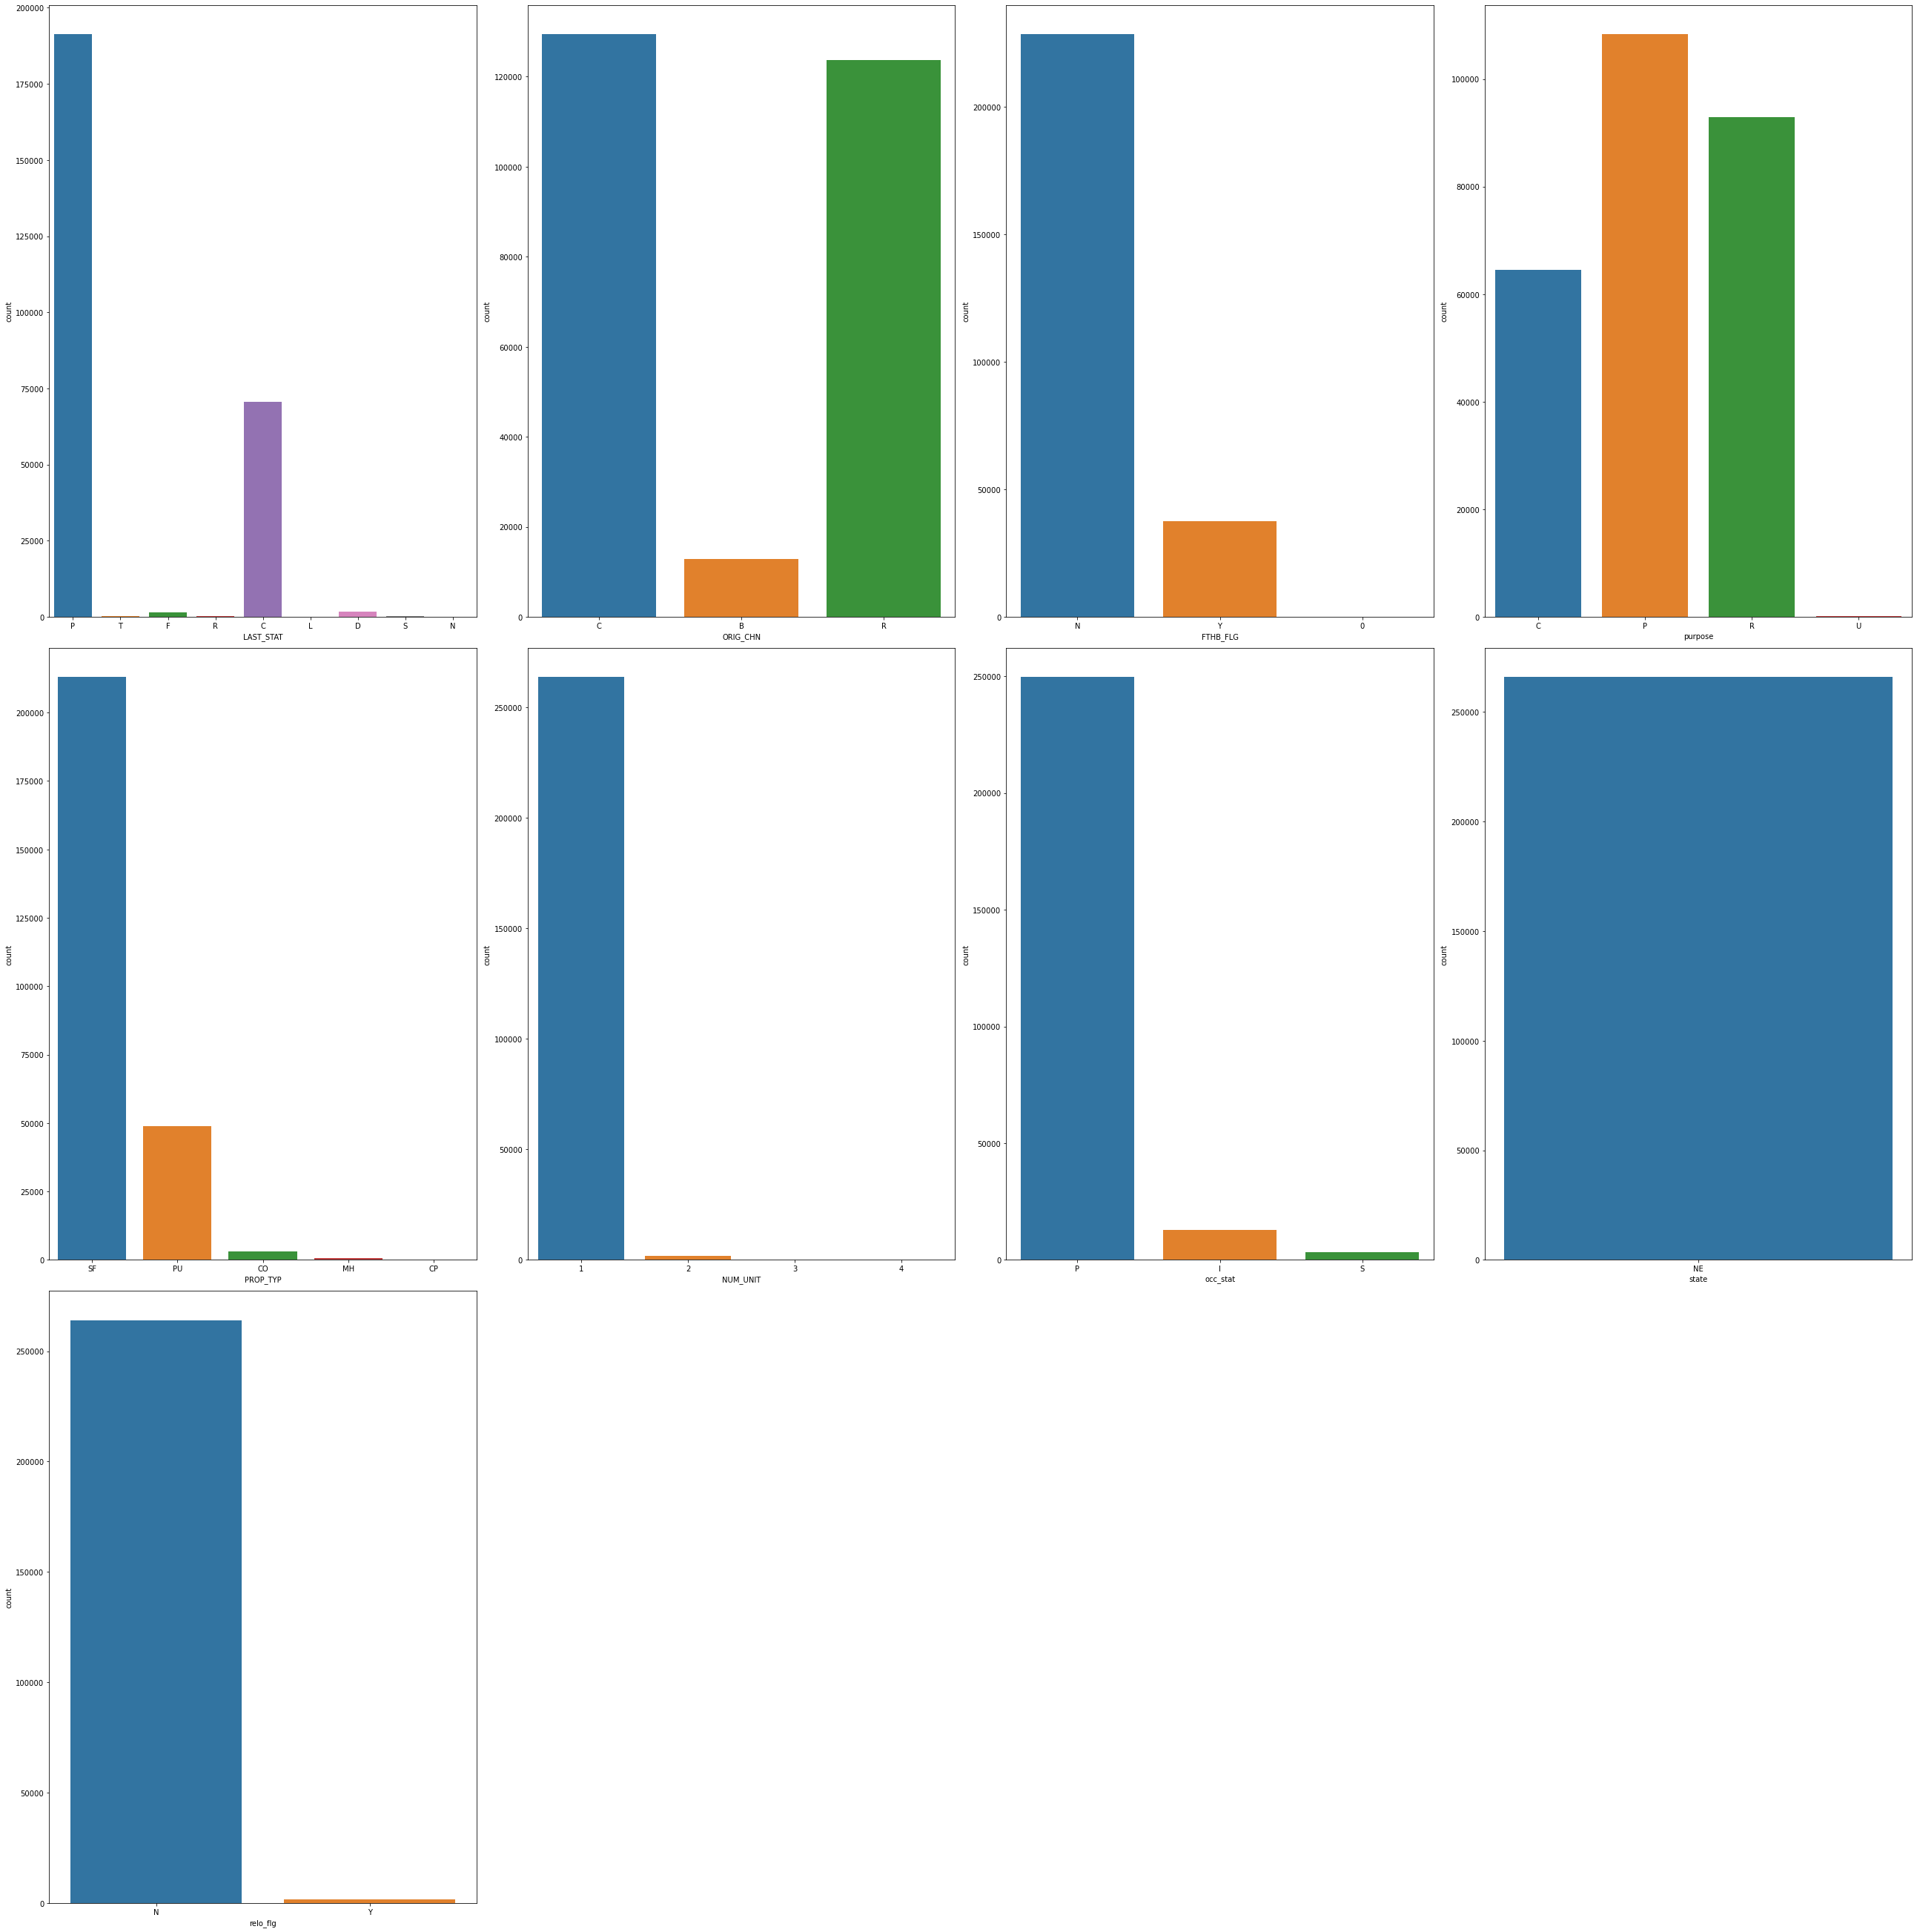

In [10]:
# countplot for low dimension categorical columns
fig = plt.figure(figsize=(36,72))
for index,col in enumerate(low_dim_cat_col):
    plt.subplot(6,4,index+1)
    sns.countplot(newdat.loc[:,col].dropna())
fig.tight_layout(pad=1.0)

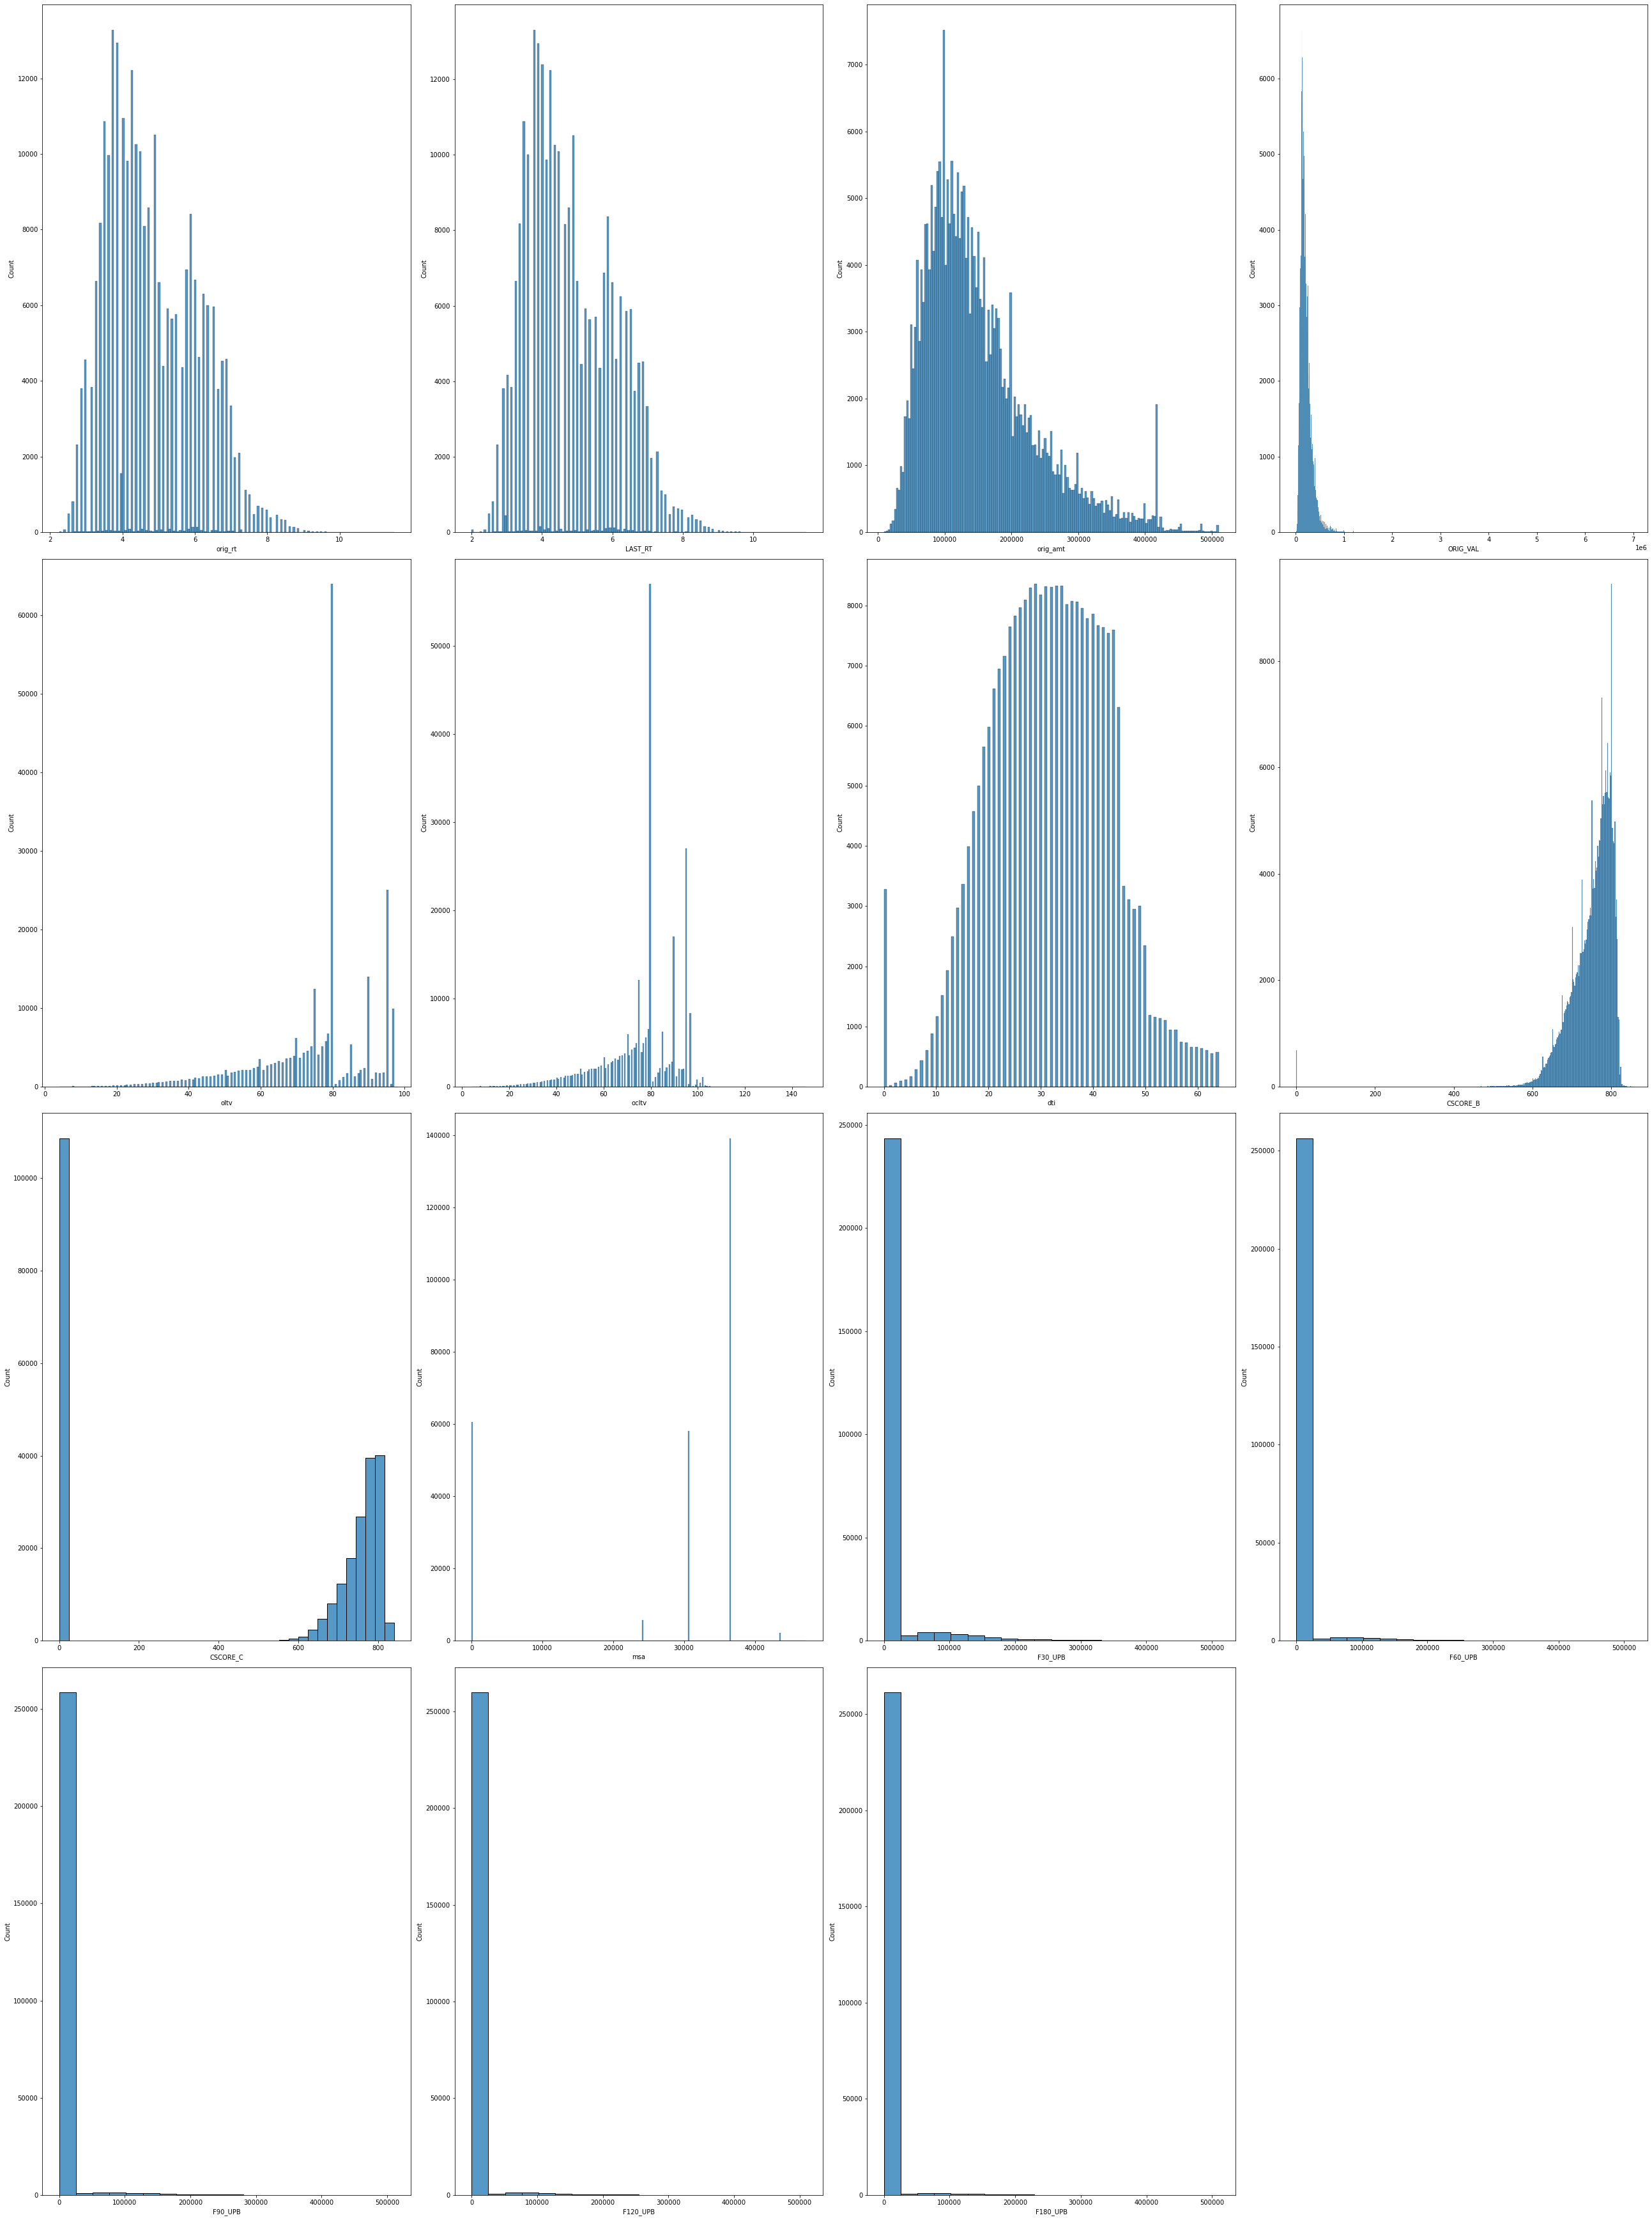

In [11]:
# histogram for high dimension numerical columns
fig = plt.figure(figsize=(36,72))
for index,col in enumerate(high_dim_num_col):
    plt.subplot(6,4,index+1)
    sns.histplot(newdat.loc[:,col].dropna())
fig.tight_layout(pad=1.0)

we find 8th vairable and the last 5 variables has so many variables with 0s value

In [12]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(newdat, .20)

orig_rt   orig_amt   -0.299676
orig_amt  LAST_RT    -0.299042
orig_rt   ORIG_VAL   -0.293893
ORIG_VAL  LAST_RT    -0.292594
CSCORE_B  orig_rt    -0.280883
          LAST_RT    -0.275405
ORIG_VAL  oltv       -0.231083
CSCORE_C  orig_amt    0.207769
ocltv     orig_amt    0.209158
CSCORE_C  ORIG_VAL    0.222875
F180_UPB  F30_UPB     0.392822
F120_UPB  F30_UPB     0.472858
F30_UPB   F90_UPB     0.532492
          F60_UPB     0.603495
F60_UPB   F180_UPB    0.653981
F180_UPB  F90_UPB     0.745752
F60_UPB   F120_UPB    0.783719
F120_UPB  F180_UPB    0.834754
ORIG_VAL  orig_amt    0.864922
F60_UPB   F90_UPB     0.877860
F90_UPB   F120_UPB    0.893933
ocltv     oltv        0.974977
LAST_RT   orig_rt     0.995276
orig_rt   orig_rt          NaN
dtype: float64

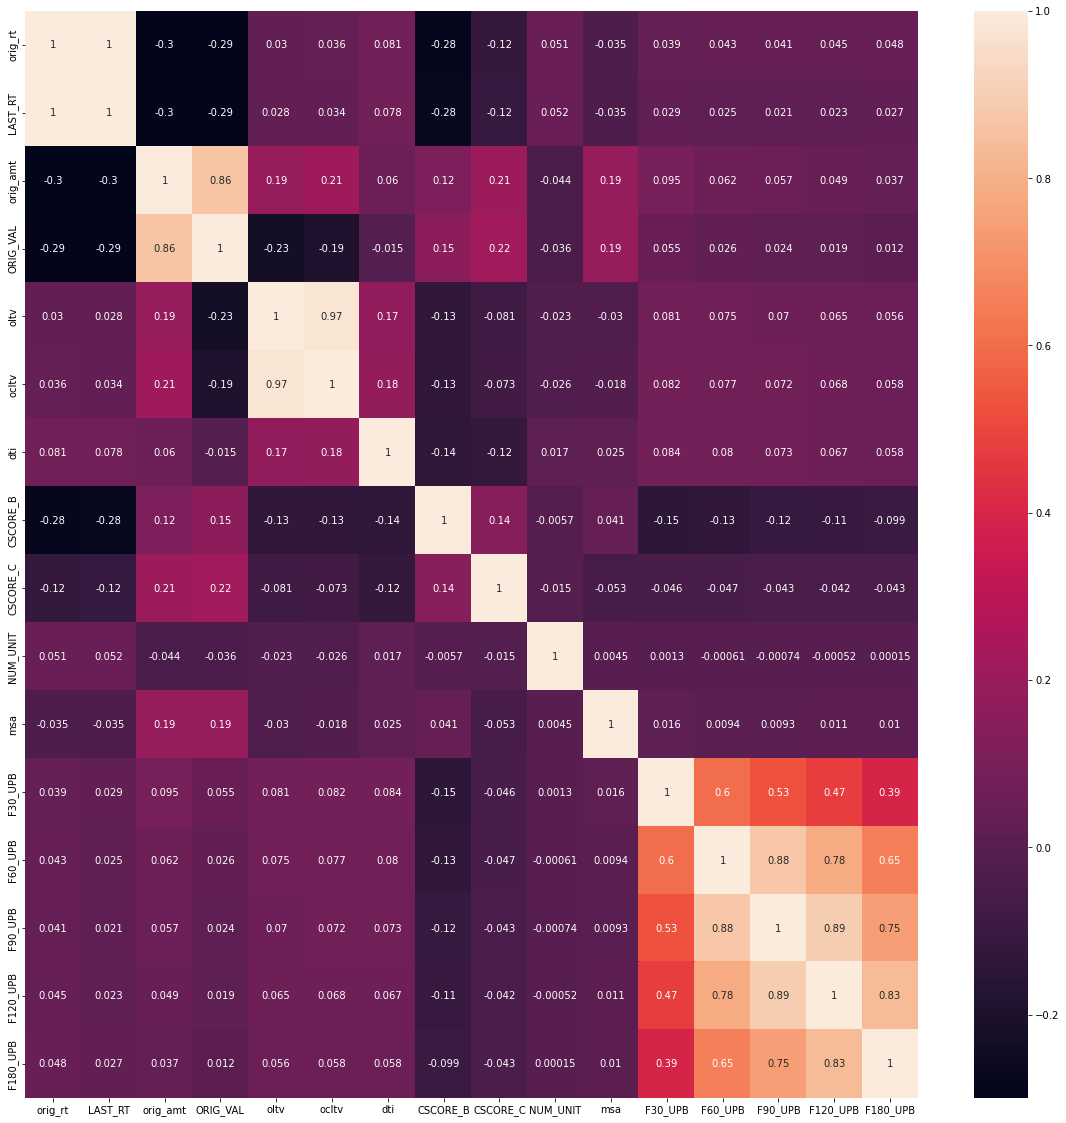

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(newdat.corr(), annot = True)

In [14]:
#data.to_csv('MMAdata.csv')
# visualization ppt 3
# binning info
# https://www.valuepenguin.com/average-credit-score
bins = [0, 580,670,740,800,850]
labels = ["Very poor","Fair","Good","Very good","exceptional"]
data['c_score_group'] = pd.cut(data['CSCORE_B'], bins, labels = labels)
data['c_score_group']


0         Very good
1              Good
2         Very good
3              Good
4              Good
            ...    
265865    Very good
265866    Very good
265867         Good
265868         Good
265869    Very good
Name: c_score_group, Length: 265870, dtype: category
Categories (5, object): ['Very poor' < 'Fair' < 'Good' < 'Very good' < 'exceptional']

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


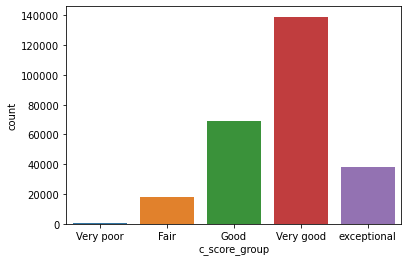

In [15]:
sns.countplot(data.loc[:,'c_score_group'].dropna())

In [73]:
data_fraud = data.loc[data['FCC_DTE']!=0]
data_fraud.loc[(data_fraud['LAST_STAT'] == 'F'), 'FRAUD'] = 1
data_fraud.loc[data_fraud['FRAUD'] != 1, 'FRAUD'] = 0

C:\Users\24937\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\24937\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\24937\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [74]:
c_score_fraud = data_fraud.groupby(['c_score_group'])['FRAUD'].sum()
c_score_fraud

c_score_group
Very poor       26.0
Fair           519.0
Good           651.0
Very good      207.0
exceptional     18.0
Name: FRAUD, dtype: float64

In [75]:
c_score_groups = data_fraud.groupby(['c_score_group'])['LAST_STAT'].count()

In [80]:
cscore_fraud = pd.DataFrame(c_score_fraud/c_score_groups)
cscore_fraud.reset_index(level=0, inplace=True)

In [81]:
cscore_fraud

c_score_group         0
0     Very poor  0.043333
1          Fair  0.030090
2          Good  0.010112
3     Very good  0.001619
4   exceptional  0.000514

In [82]:
cscore_fraud.to_csv('cscore_fraud.csv')

In [21]:
len(data.loc[data['LAST_STAT'] == "F"])

1432

In [22]:
data.groupby(['c_score_group'])['LAST_STAT'].count()

c_score_group
Very poor         600
Fair            17845
Good            69227
Very good      139099
exceptional     38417
Name: LAST_STAT, dtype: int64

In [23]:
c_score_profit = data.groupby(['c_score_group'])['profit'].mean()
c_score_profit

c_score_group
Very poor      131006.941160
Fair           151962.193904
Good           170114.337631
Very good      178768.676244
exceptional    154634.919048
Name: profit, dtype: float64

In [24]:
pd.DataFrame(c_score_profit).to_csv('profit.csv')

In [25]:
data['year'] = data['LAST_DTE'].str.slice(0, 4)

In [26]:
year_profit = pd.DataFrame(data.groupby(['year'])['profit'].mean())
year_profit.reset_index(level=0, inplace=True)
year_profit

year         profit
0   2002  229017.716040
1   2003  193549.759503
2   2004  161323.107269
3   2005  153787.329898
4   2006  143346.942198
5   2007  161503.088410
6   2008  200745.239734
7   2009  240203.115518
8   2010  211730.657756
9   2011  193918.372454
10  2012  189904.763340
11  2013  160807.621599
12  2014  138739.902714
13  2015  153735.538867
14  2016  159365.792305
15  2017  135159.537547
16  2018  133582.953328
17  2019  176828.500033
18  2020  204208.494226
19  2021  145313.115138

In [27]:
year_profit.to_csv('year_profit.csv')

In [28]:
year_msa_profit = pd.DataFrame(data.groupby(['year','msa'])['profit'].mean())
year_msa_profit.reset_index(level=0, inplace=True)
year_msa_profit

year         profit
msa                       
0      2002  183725.888087
24260  2002   80859.063500
29820  2002  451200.000000
30700  2002  226735.996496
36540  2002  247054.916168
...     ...            ...
24260  2021  126679.484486
30700  2021  145951.719592
35620  2021 -126701.300000
36540  2021  157984.682429
43580  2021  107805.257975

[117 rows x 2 columns]

In [29]:
pd.pivot_table(year_msa_profit, index = 'year', columns = 'msa', values = 'profit')

msa           0         10740     11700     16740     16980          24260  \
year                                                                         
2002  183725.888087       NaN       NaN       NaN       NaN   80859.063500   
2003  157379.264880       NaN       NaN  193200.0  432600.0   84738.818925   
2004  131272.126847  484950.0       NaN       NaN       NaN   71455.626757   
2005  116912.252365       NaN       NaN       NaN       NaN   59870.718889   
2006  114433.015657       NaN       NaN       NaN       NaN   75908.225758   
2007  123253.358881       NaN       NaN       NaN       NaN   61453.708500   
2008  150968.676192       NaN  241200.0       NaN       NaN   62642.761429   
2009  198923.110309       NaN       NaN       NaN       NaN   79313.710411   
2010  172893.294284       NaN       NaN       NaN       NaN   83385.944457   
2011  160666.147480       NaN       NaN       NaN       NaN   80687.630909   
2012  158039.295831       NaN       NaN  186300.0       NaN   77852.140311   
2013  138678.474154       NaN       NaN       NaN       NaN   61370.721905   
2014  113840.745651       NaN       NaN       NaN       NaN   95342.061143   
2015  118895.529690       NaN       NaN       NaN       NaN  114871.985556   
2016  122947.697481       NaN       NaN       NaN       NaN  134469.064669   
2017  107443.920049       NaN       NaN       NaN       NaN  102749.180943   
2018  110249.228214       NaN       NaN       NaN       NaN  108835.133133   
2019  134972.390193       NaN       NaN       NaN       NaN  142232.213562   
2020  171148.464891       NaN       NaN       NaN       NaN  165315.519161   
2021  121418.156700       NaN       NaN       NaN       NaN  126679.484486   

msa      28140     29820          30700     31700     34980     35620  \
year                                                                    
2002       NaN  451200.0  226735.996496       NaN       NaN       NaN   
2003       NaN  341475.0  190326.969860       NaN  522900.0  281325.0   
2004       NaN  534037.5  162267.564512       NaN       NaN       NaN   
2005       NaN       NaN  164747.066489       NaN       NaN       NaN   
2006       NaN       NaN  161357.224614       NaN       NaN       NaN   
2007       NaN       NaN  168464.167807       NaN       NaN       NaN   
2008       NaN       NaN  213829.114603       NaN       NaN       NaN   
2009       NaN       NaN  245026.527458       NaN       NaN       NaN   
2010       NaN       NaN  211775.081537       NaN       NaN       NaN   
2011  206250.0       NaN  191899.389139  438750.0       NaN       NaN   
2012       NaN  377850.0  186161.349422       NaN       NaN       NaN   
2013       NaN       NaN  156879.258953       NaN       NaN       NaN   
2014       NaN       NaN  139064.680770       NaN       NaN       NaN   
2015       NaN       NaN  152136.194922       NaN       NaN       NaN   
2016       NaN       NaN  157404.096717       NaN       NaN       NaN   
2017       NaN       NaN  130655.767621       NaN       NaN       NaN   
2018       NaN       NaN  135249.526363       NaN       NaN       NaN   
2019       NaN       NaN  177483.593264       NaN       NaN       NaN   
2020       NaN       NaN  203657.928669       NaN       NaN       NaN   
2021       NaN       NaN  145951.719592       NaN       NaN -126701.3   

msa           36540     38860     42140          43580     47260  
year                                                              
2002  247054.916168       NaN       NaN  142797.494769       NaN  
2003  208697.117846       NaN       NaN  132187.378074       NaN  
2004  176349.694519       NaN       NaN   99646.018367       NaN  
2005  169739.729052       NaN       NaN  102442.577000       NaN  
2006  154071.461128       NaN  170100.0   97534.947907       NaN  
2007  184126.937224       NaN       NaN   91796.930208       NaN  
2008  225433.586917       NaN       NaN  102460.606964       NaN  
2009  258216.637083       NaN       NaN  157194.120769       NaN  
2010  

In [30]:
year_msa_profit = pd.pivot_table(year_msa_profit, index = 'year', columns = 'msa', values = 'profit').dropna(axis = 1)
year_msa_profit

msa           0              24260          30700          36540  \
year                                                               
2002  183725.888087   80859.063500  226735.996496  247054.916168   
2003  157379.264880   84738.818925  190326.969860  208697.117846   
2004  131272.126847   71455.626757  162267.564512  176349.694519   
2005  116912.252365   59870.718889  164747.066489  169739.729052   
2006  114433.015657   75908.225758  161357.224614  154071.461128   
2007  123253.358881   61453.708500  168464.167807  184126.937224   
2008  150968.676192   62642.761429  213829.114603  225433.586917   
2009  198923.110309   79313.710411  245026.527458  258216.637083   
2010  172893.294284   83385.944457  211775.081537  231511.939243   
2011  160666.147480   80687.630909  191899.389139  214252.388643   
2012  158039.295831   77852.140311  186161.349422  208242.884511   
2013  138678.474154   61370.721905  156879.258953  176620.372231   
2014  113840.745651   95342.061143  139064.680770  153856.473597   
2015  118895.529690  114871.985556  152136.194922  172409.638494   
2016  122947.697481  134469.064669  157404.096717  176332.960762   
2017  107443.920049  102749.180943  130655.767621  151347.163515   
2018  110249.228214  108835.133133  135249.526363  146089.185968   
2019  134972.390193  142232.213562  177483.593264  196028.242260   
2020  171148.464891  165315.519161  203657.928669  219382.170598   
2021  121418.156700  126679.484486  145951.719592  157984.682429   

msa           43580  
year                 
2002  142797.494769  
2003  132187.378074  
2004   99646.018367  
2005  102442.577000  
2006   97534.947907  
2007   91796.930208  
2008  102460.606964  
2009  157194.120769  
2010  147443.154632  
2011  125491.170606  
2012  134768.553140  
2013  118817.875804  
2014   97233.349091  
2015   80953.129130  
2016   95332.799765  
2017  104302.711692  
2018   77408.496104  
2019  106467.309896  
2020  147064.734817  
2021  107805.257975

In [31]:
year_msa_profit.to_csv('year_msa_profit.csv')

In [32]:
total_transaction = pd.DataFrame(data.groupby(['year'])['LOAN_ID'].count())
total_transaction.reset_index(level=0, inplace=True)
total_transaction.rename(columns = {'LOAN_ID':'Occurance'}, inplace = True)

In [33]:
total_transaction.to_csv('total_transaction.csv')

In [34]:
total_transaction

year  Occurance
0   2002       6144
1   2003      13591
2   2004       5390
3   2005       4377
4   2006       3432
5   2007       3650
6   2008       4909
7   2009      11318
8   2010      11645
9   2011      10912
10  2012      15709
11  2013      11308
12  2014       7066
13  2015       9106
14  2016      10872
15  2017       8964
16  2018       8699
17  2019      12282
18  2020      27147
19  2021      79349

In [35]:
data_fraud['year'] = data['year']

C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
year_fraud = data_fraud.groupby(['year'])['FRAUD'].sum()
year_fraud

year
2002     11.0
2003     35.0
2004     45.0
2005     48.0
2006     61.0
2007     61.0
2008     88.0
2009    128.0
2010    155.0
2011    215.0
2012    166.0
2013    116.0
2014     95.0
2015     65.0
2016     41.0
2017     28.0
2018     26.0
2019     14.0
2020     30.0
2021      4.0
Name: FRAUD, dtype: float64

In [37]:
year_groups = data_fraud.groupby(['year'])['FRAUD'].count()
percentage_fraud = pd.DataFrame(year_fraud/year_groups)
percentage_fraud.reset_index(level=0, inplace=True)
percentage_fraud

year     FRAUD
0   2002  0.001790
1   2003  0.002575
2   2004  0.008349
3   2005  0.010966
4   2006  0.017774
5   2007  0.016712
6   2008  0.017926
7   2009  0.011309
8   2010  0.013310
9   2011  0.019703
10  2012  0.010567
11  2013  0.010258
12  2014  0.013445
13  2015  0.007138
14  2016  0.003771
15  2017  0.003124
16  2018  0.002989
17  2019  0.001142
18  2020  0.001223
19  2021  0.000065

In [38]:
percentage_fraud.to_csv('year_percentage_fraud.csv')

In [39]:
data_fraud = data.loc[data['FCC_DTE']!=0]
data_fraud

LOAN_ID    LAST_DTE LAST_STAT ORIG_CHN                   SELLER  \
0       1.005381e+11  2002-08-01         P        C                    Other   
1       1.008168e+11  2002-09-01         P        B                    Other   
2       1.022925e+11  2002-08-01         P        C  Jpmorgan Chase Bank, Na   
3       1.030179e+11  2002-02-01         P        R                    Other   
4       1.045302e+11  2002-12-01         P        C             Amtrust Bank   
...              ...         ...       ...      ...                      ...   
245755  9.776617e+07  2021-03-01         C        R                    Other   
245756  9.776622e+07  2021-03-01         C        C   Wells Fargo Bank, N.A.   
245757  9.776624e+07  2020-12-01         P        R   Wells Fargo Bank, N.A.   
245758  9.776633e+07  2021-01-01         P        C                    Other   
245759  9.776650e+07  2021-03-01         C        R                    Other   

                                         SERVICER  orig_rt  LAST_RT  orig_amt  \
0             Citimortgage Asset Management, Inc.    7.750    7.750     60000   
1                                           Other    8.000    8.000     94000   
2                         Jpmorgan Chase Bank, Na    7.750    7.750     50000   
3                                           Other    6.150    6.150     84000   
4       Jpmorgan Chase Bank, National Association    8.250    8.250     30000   
...                                           ...      ...      ...       ...   
245755                                      Other    4.250    4.250    114000   
245756                     Wells Fargo Bank, N.A.    3.750    3.750    228000   
245757                     Wells Fargo Bank, N.A.    3.625    3.625    278000   
245758                                      Other    4.250    4.250    120000   
245759            Specialized Loan Servicing, LLC    4.250    4.250     98000   

         ORIG_VAL  ...  F120_UPB  F180_DTE F180_UPB LPI_DTE  FCC_DTE  \
0       109090.91  ...       0.0         0      0.0       0        0   
1       104444.44  ...       0.0         0      0.0       0        0   
2        68493.15  ...       0.0         0      0.0       0        0   
3        88421.05  ...       0.0         0      0.0       0        0   
4        37500.00  ...       0.0         0      0.0       0        0   
...           ...  ...       ...       ...      ...     ...      ...   
245755  142500.00  ...       0.0         0      0.0       0        0   
245756  285000.00  ...       0.0         0      0.0       0        0   
245757  347500.00  ...       0.0         0      0.0       0        0   
245758  160000.00  ...       0.0         0      0.0       0        0   
245759  122500.00  ...       0.0         0      0.0       0        0   

        NET_LOSS  relo_flg    profit  c_score_group  year  
0            0.0         N   69750.0      Very good  2002  
1            0.0         N  225600.0           Good  2002  
2            0.0         N  116250.0      Very good  2002  
3            0.0         N  154980.0           Good  2002  
4            0.0         N   37125.0           Good  2002  
...          ...       ...       ...            ...   ...  
245755       0.0         N  145350.0      Very good  2021  
245756       0.0         N  256500.0      Very good  2021  
245757       0.0         N  302325.0    exceptional  2020  
245758       0.0         N  153000.0      Very good  2021  
245759       0.0         N  124950.0      Very good  2021  

[245760 rows x 46 columns]

In [40]:
data_fraud = data.loc[data['FCC_DTE']!=0]
data_fraud.loc[(data_fraud['LAST_STAT'] == 'F'), 'FRAUD'] = 1
data_fraud.loc[data_fraud['FRAUD'] != 1, 'FRAUD'] = 0

C:\Users\24937\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\24937\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\24937\Anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [41]:
servicer_fraud = pd.DataFrame(data_fraud.groupby(['SERVICER'])['FRAUD'].sum())
servicer_fraud

FRAUD
SERVICER                                                 
Ally Bank                                             3.0
AmeriHome Mortgage Company, LLC                       0.0
Amerihome Mortgage Company, Llc                       0.0
Amtrust Bank                                          0.0
Arvest Central Mortgage Company                       0.0
...                                                   ...
United Shore Financial Services, LLC dba United...    0.0
United Shore Financial Services, Llc Dba United...    0.0
United Wholesale Mortgage, LLC                        0.0
Usaa Federal Savings Bank                             0.0
Wells Fargo Bank, N.A.                              160.0

[81 rows x 1 columns]

In [42]:
servicer_fraud = data_fraud.groupby(['SERVICER'])['FRAUD'].sum()
servicer_fraud_groups = data_fraud.groupby(['SERVICER'])['FRAUD'].count()
servicer_fraud_rate = pd.DataFrame(servicer_fraud / servicer_fraud_groups)
servicer_fraud_rate.reset_index(level=0, inplace=True)
servicer_fraud_rate

SERVICER     FRAUD
0                                           Ally Bank  0.007143
1                     AmeriHome Mortgage Company, LLC  0.000000
2                     Amerihome Mortgage Company, Llc  0.000000
3                                        Amtrust Bank  0.000000
4                     Arvest Central Mortgage Company  0.000000
..                                                ...       ...
76  United Shore Financial Services, LLC dba Unite...  0.000000
77  United Shore Financial Services, Llc Dba Unite...  0.000000
78                     United Wholesale Mortgage, LLC  0.000000
79                          Usaa Federal Savings Bank  0.000000
80                             Wells Fargo Bank, N.A.  0.004631

[81 rows x 2 columns]

In [43]:
servicer_fraud_rate = servicer_fraud_rate.sort_values(by = 'FRAUD',ascending = False)

In [44]:
servicer_fraud_rate

SERVICER     FRAUD
19  Fannie Mae/Seterus, Inc. As Subservicer  0.246377
30                Green Tree Servicing, Llc  0.041971
27     Flagstar Capital Markets Corporation  0.037162
45                 Nationstar Mortgage, Llc  0.031250
29                       Gmac Mortgage, Llc  0.028928
..                                      ...       ...
7                     Bank of America, N.A.  0.000000
48               Nycb Mortgage Company, Llc  0.000000
5               Aurora Financial Group Inc.  0.000000
22                         Fifth Third Bank  0.000000
40             Lakeview Loan Servicing, Llc  0.000000

[81 rows x 2 columns]

In [45]:
# graph 2
servicer_fraud_rate[0:5].to_csv('servicer_fraud_rate.csv')

In [46]:
servicer_profit = pd.DataFrame(data.groupby(['SERVICER'])['profit'].sum())
servicer_profit.reset_index(level = 0, inplace = True)
servicer_profit = servicer_profit.sort_values(by = 'profit',ascending = False)
servicer_profit

SERVICER        profit
56                                              Other  2.126501e+10
87                             Wells Fargo Bank, N.A.  6.564335e+09
6                               Bank Of America, N.A.  2.133424e+09
42                            Jpmorgan Chase Bank, Na  2.015696e+09
15                                 Citimortgage, Inc.  1.433669e+09
..                                                ...           ...
84  United Shore Financial Services, Llc Dba Unite...  3.519750e+05
74                         Select Portfolio Servicing  3.494127e+05
21           Fairway Independent Mortgage Corporation  2.175000e+05
54                         Nycb Mortgage Company, Llc  1.730625e+05
60                        PennyMac Loan Services, LLC  8.190000e+04

[89 rows x 2 columns]

In [47]:
servicer_profit[1:6].to_csv('servicer_profit.csv')

In [48]:
servicer_fraud / servicer_fraud_groups

SERVICER
Ally Bank                                                             0.007143
AmeriHome Mortgage Company, LLC                                       0.000000
Amerihome Mortgage Company, Llc                                       0.000000
Amtrust Bank                                                          0.000000
Arvest Central Mortgage Company                                       0.000000
                                                                        ...   
United Shore Financial Services, LLC dba United Wholesale Mortgage    0.000000
United Shore Financial Services, Llc Dba United Wholesale Mortgage    0.000000
United Wholesale Mortgage, LLC                                        0.000000
Usaa Federal Savings Bank                                             0.000000
Wells Fargo Bank, N.A.                                                0.004631
Name: FRAUD, Length: 81, dtype: float64

In [49]:
servicer_profit['SERVICER'][1:6].tolist()

['Wells Fargo Bank, N.A.',
 'Bank Of America, N.A.',
 'Jpmorgan Chase Bank, Na',
 'Citimortgage, Inc.',
 'U.S. Bank N.A.']

In [50]:
servicer_fraud_rate = servicer_fraud_rate[servicer_fraud_rate.SERVICER.isin(['Wells Fargo Bank, N.A.', 'Bank Of America, N.A.', 'Jpmorgan Chase Bank, Na', 'Citimortgage, Inc.', 'U.S. Bank N.A.'])]

In [51]:
servicer_fraud_rate.to_csv('servicer_fraud_rate.csv')

In [52]:
servicer_profit['SERVICER'][1:6].tolist()

['Wells Fargo Bank, N.A.',
 'Bank Of America, N.A.',
 'Jpmorgan Chase Bank, Na',
 'Citimortgage, Inc.',
 'U.S. Bank N.A.']

In [53]:
year_interest = pd.DataFrame(data_fraud.groupby(['year'])['orig_rt'].mean())
year_interest.reset_index(level=0, inplace=True)
year_interest

year   orig_rt
0   2002  7.263946
1   2003  6.734086
2   2004  6.475358
3   2005  6.237053
4   2006  6.069463
5   2007  6.056488
6   2008  6.100517
7   2009  6.043563
8   2010  5.724468
9   2011  5.514702
10  2012  5.167178
11  2013  5.064121
12  2014  4.790081
13  2015  4.560241
14  2016  4.358075
15  2017  4.255582
16  2018  4.143287
17  2019  4.202232
18  2020  4.142746
19  2021  4.057714

In [54]:
year_interest.to_csv('year_interest.csv')

In [55]:
data['ORIG_CHN'].value_counts()

C    129464
R    123601
B     12805
Name: ORIG_CHN, dtype: int64

In [83]:
data.loc[data['SERVICER'] == 'Wells Fargo Bank, N.A.']['ORIG_CHN'].value_counts()

R    18912
C    17495
B      626
Name: ORIG_CHN, dtype: int64

In [84]:
data['PROP_TYP'].value_counts()

SF    212943
PU     49017
CO      3166
MH       743
CP         1
Name: PROP_TYP, dtype: int64

In [85]:
data.loc[data['SERVICER'] == 'Wells Fargo Bank, N.A.']['PROP_TYP'].value_counts()

SF    27930
PU     8464
CO      524
MH      115
Name: PROP_TYP, dtype: int64

In [60]:
data['ORIG_VAL'].mean()

206340.38004494747

In [86]:
data.loc[data['SERVICER'] == 'Wells Fargo Bank, N.A.']['ORIG_VAL'].mean()

221518.99862419988

In [62]:
data['orig_rt'].mean()

4.809179546394794

In [87]:
data.loc[data['SERVICER'] == 'Wells Fargo Bank, N.A.']['orig_rt'].mean()

4.541262090567858

In [64]:
data['oltv'].mean()

75.18072742317673

In [65]:
data['dti'].mean()

31.7713807499906

In [88]:
data.loc[data['SERVICER'] == 'Wells Fargo Bank, N.A.']['oltv'].mean()

75.77212216131558

In [89]:
data.loc[data['SERVICER'] == 'Wells Fargo Bank, N.A.']['dti'].mean()

31.24372856641374

In [68]:
data['CSCORE_B'].mean()

751.3981080979426

In [90]:
data.loc[data['SERVICER'] == 'Wells Fargo Bank, N.A.']['CSCORE_B'].mean()

756.2117840844652

In [70]:
data['orig_trm'].mean()

300.2861548877271

In [91]:
data.loc[data['SERVICER'] == 'Wells Fargo Bank, N.A.']['orig_trm'].mean()

300.6733723975913

In [93]:
data['ORIG_VAL'].mean()

206340.38004494747

In [94]:
data.loc[data['SERVICER'] == 'Wells Fargo Bank, N.A.']['ORIG_VAL'].mean()

221518.99862419988

In [95]:
221518.99862419988/206340.38004494747 -1

0.07356106728089795